# Quantum Teleportation

In [69]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [ ]:
# USING IBM ACCOUNT
from qiskit import IBMQ
IBMQ.save_account('204dd21e9ad41b0a4f083adc9b86409aca9ec78d010bb4d8c67a795250\
                   9bfd1c177cd34950267b9d8f9e203e465cbcf3099a81be62409bb4d8286328405b63c6')
IBMQ.load_account()
IBMQ.providers()

In [31]:
circuit = QuantumCircuit(3, 3)

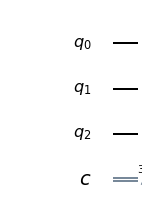

In [32]:
%matplotlib inline
circuit.draw(output='mpl')

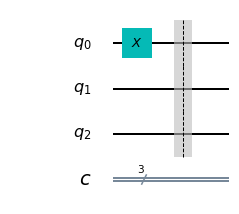

In [33]:
# We teleport the state of q0 to q2 (ie, state q2 will change from 0 to 1)
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

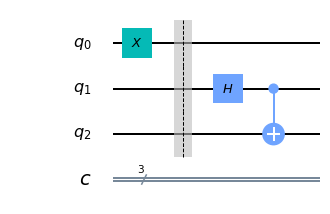

In [34]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

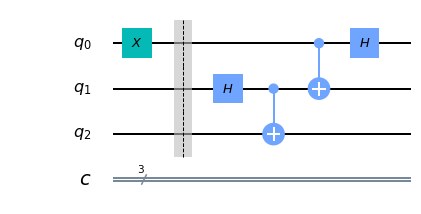

In [35]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

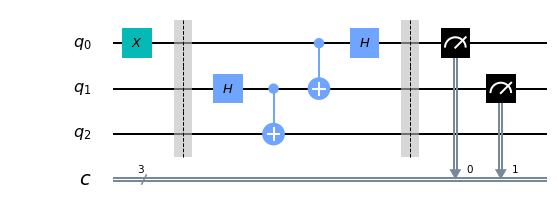

In [36]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

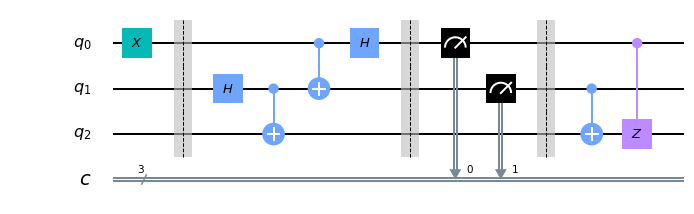

In [37]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

Counts:  {'100': 250, '110': 235, '101': 260, '111': 279}


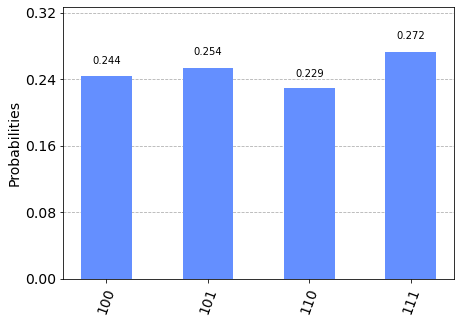

In [38]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
print('Counts: ', counts)
plot_histogram(counts)

# Bernstein-Vazirani Algorithm
Imagine a hidden number with six bits, how many attempt needed to guess that number correctly? the answer is 6 tries with a classical computer. The BV algorithm is a way to find out about that number in one try regardless of the length of the bits that is expressed with.

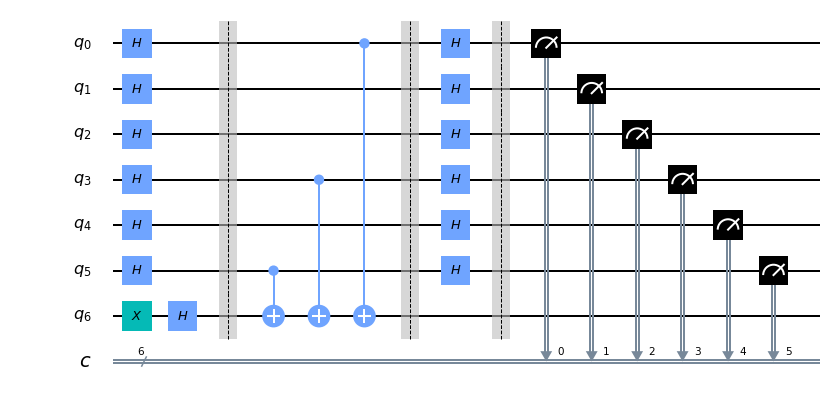

In [42]:
secret_number = '101001'
circuit = QuantumCircuit(6+1, 6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()

circuit.h([0,1,2,3,4,5])
circuit.barrier()

circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

circuit.draw(output='mpl')

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [92]:
# GENERALIZED EXAMPLE FOR ANY SECRET NUMBER EXPRESSED IN BITS
'''
Running on a simulator.
'''
def find_number_sim(number):
    circuit = QuantumCircuit(len(number)+1, len(number))
    circuit.h(range(len(number)))
    circuit.x(len(number))
    circuit.h(len(number))
    circuit.barrier()

    for ii, yesno in enumerate(reversed(number)):
        if yesno == '1':
            circuit.cx(ii, len(number))

    circuit.barrier()

    circuit.h(range(len(number)))
    circuit.barrier()

    circuit.measure(range(len(number)), range(len(number)))

    circuit.draw(output='mpl')
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=simulator, shots=1).result()
    return result.get_counts()

{'1011': 1}


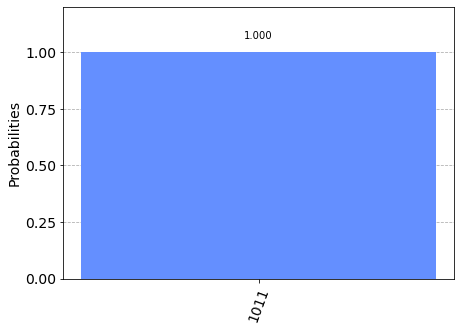

In [98]:
run = find_number_sim('1011')
print(run)
plot_histogram(run)

In [95]:
# GENERALIZED EXAMPLE FOR ANY SECRET NUMBER EXPRESSED IN BITS
'''
Running on an IBMQ quantum computer.
'''
def find_number(number):
    circuit = QuantumCircuit(len(number)+1, len(number))
    circuit.h(range(len(number)))
    circuit.x(len(number))
    circuit.h(len(number))
    circuit.barrier()

    for ii, yesno in enumerate(reversed(number)):
        if yesno == '1':
            circuit.cx(ii, len(number))

    circuit.barrier()

    circuit.h(range(len(number)))
    circuit.barrier()

    circuit.measure(range(len(number)), range(len(number)))

    circuit.draw(output='mpl')
    
    provider = IBMQ.get_provider(group='open')
    simulator = provider.get_backend('ibmq_essex')
    exper = execute(circuit, backend=simulator, shots=1)
    job_monitor(exper)
    result = exper.result()
    return result.get_counts()

Job Status: job has successfully run
{'1011': 1}


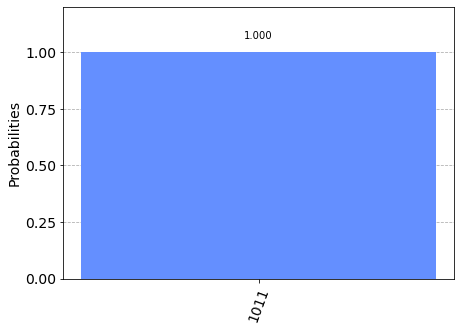

In [97]:
run = find_number('1011')
print(run)
plot_histogram(run)